In [60]:
import json
results_json = open('results.json', 'r')
results = json.loads(results_json.read())

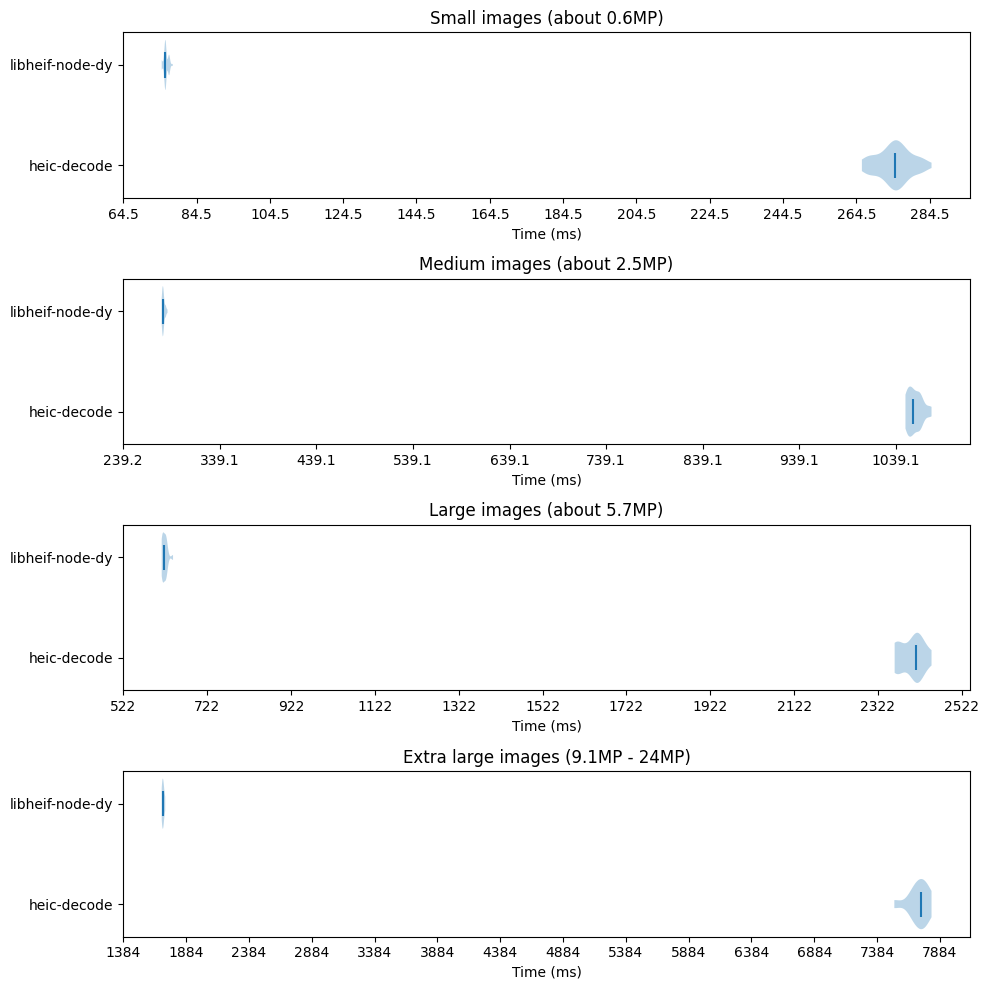

In [61]:
import matplotlib.pyplot as plt
import numpy as np

small = [results['heicDecode']['small'], results['nodeDecode']['small']]
medium = [results['heicDecode']['medium'], results['nodeDecode']['medium']]
large = [results['heicDecode']['large'], results['nodeDecode']['large']]
original = [results['heicDecode']['original'], results['nodeDecode']['original']]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))

axs[0].violinplot(small, [1, 2], showmedians=True, widths=0.5, vert=False, showextrema=False)
axs[0].set_title('Small images (about 0.6MP)')
axs[0].set_xlabel('Time (ms)')
axs[0].set_yticks([1, 2], labels=['heic-decode', 'libheif-node-dy'])
start, end = axs[0].get_xlim()
axs[0].set_xticks(np.arange(start, end, 20))

axs[1].violinplot(medium, [1, 2], showmedians=True, widths=0.5, vert=False, showextrema=False)
axs[1].set_title('Medium images (about 2.5MP)')
axs[1].set_xlabel('Time (ms)')
axs[1].set_yticks([1, 2], labels=['heic-decode', 'libheif-node-dy'])
start, end = axs[1].get_xlim()
axs[1].set_xticks(np.arange(start, end, 100))


axs[2].violinplot(large, [1, 2], showmedians=True, widths=0.5, vert=False, showextrema=False)
axs[2].set_title('Large images (about 5.7MP)')
axs[2].set_xlabel('Time (ms)')
axs[2].set_yticks([1, 2], labels=['heic-decode', 'libheif-node-dy'])
start, end = axs[2].get_xlim()
axs[2].set_xticks(np.arange(start, end, 200))


axs[3].violinplot(original, [1, 2], showmedians=True, widths=0.5, vert=False, showextrema=False)
axs[3].set_title('Extra large images (9.1MP - 24MP)')
axs[3].set_xlabel('Time (ms)')
axs[3].set_yticks([1, 2], labels=['heic-decode', 'libheif-node-dy'])
start, end = axs[3].get_xlim()
axs[3].set_xticks(np.arange(start, end, 500))


plt.tight_layout()

In [64]:
heic_small_mean = np.mean(results['heicDecode']['small'])
heic_medium_mean = np.mean(results['heicDecode']['medium'])
heic_large_mean = np.mean(results['heicDecode']['large'])
heic_original_mean = np.mean(results['heicDecode']['original'])

node_small_mean = np.mean(results['nodeDecode']['small'])
node_medium_mean = np.mean(results['nodeDecode']['medium'])
node_large_mean = np.mean(results['nodeDecode']['large'])
node_original_mean = np.mean(results['nodeDecode']['original'])

node_small_speedup = ((heic_small_mean - node_small_mean) / node_small_mean + 1)
node_medium_speedup = ((heic_medium_mean - node_medium_mean) / node_medium_mean + 1)
node_large_speedup = ((heic_large_mean - node_large_mean) / node_large_mean + 1)
node_original_speedup = ((heic_original_mean - node_original_mean) / node_original_mean + 1)

print('Small image speedup: {:.2f} times faster'.format(node_small_speedup))
print('Medium image speedup: {:.2f} times faster'.format(node_medium_speedup))
print('Large image speedup: {:.2f} times faster'.format(node_large_speedup))
print('Original image speedup: {:.2f} times faster'.format(node_original_speedup))

Small image speedup: 3.61 times faster
Medium image speedup: 3.77 times faster
Large image speedup: 3.87 times faster
Original image speedup: 4.53 times faster
